In [1]:
%pip install --upgrade pip jupysql ipywidgets ipympl duckdb duckdb-engine pandas matplotlib jupyterlab pyarrow numpy scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import duckdb
import pandas as pd
import ipywidgets as widgets
from matplotlib import pyplot as plt, dates, ticker
import numpy as np
%load_ext sql
%matplotlib widget
conn = duckdb.connect()
%sql conn --alias duckdb
pd.options.mode.copy_on_write = True

In [3]:
%config SqlMagic.autopandas = True
#%config SqlMagic.displaycon = False

In [4]:
%%sql
INSTALL sqlite;
LOAD sqlite;

Running query in 'duckdb'

,Success


In [5]:
%%sql
ATTACH '399464.db' AS expdb (TYPE SQLITE) ;
USE expdb.main;

Running query in 'duckdb'

,Success


In [6]:
# set some matplotlib defaults
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator, MicrosecondLocator
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
plt.rcParams['svg.fonttype'] = 'none'
# Set the global locator and formatter
plt.rcParams['date.autoformatter.microsecond'] = '%S.%f'  # Set the global format for microsecond level
plt.rcParams['date.autoformatter.second'] = '%H:%M:%S'  # Set the global format for second level
plt.rcParams['date.autoformatter.minute'] = '%H:%M'  # Set the global format for minute level
plt.rcParams['date.autoformatter.hour'] = '%Y-%m-%d %H:%M'  # Set the global format for hour level
plt.rcParams['date.autoformatter.day'] = '%Y-%m-%d %H:%M'  # Set the global format for day level
plt.rcParams['date.autoformatter.month'] = '%Y-%m-%d %H:%M'  # Set the global format for month level
plt.rcParams['date.autoformatter.year'] = '%Y-%m-%d %H:%M'  # Set the global format for year level


In [7]:
%sql SHOW;

Running query in 'duckdb'

,database,schema,name,column_names,column_types,temporary
0,expdb,main,Gateway,[gateway_id],[VARCHAR],False
1,expdb,main,Join_Message,"[join_message_id, app_received_at]","[BIGINT, TIMESTAMP]",False
2,expdb,main,Message,"[message_id, related_node, network_received_at]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,expdb,main,Node,"[node_deveui, node_appeui, node_appkey, board_...","[VARCHAR, VARCHAR, VARCHAR, VARCHAR, VARCHAR, ...",False
4,expdb,main,Power_Consumption,"[power_consumption_id, node_id, timestamp, cur...","[BIGINT, VARCHAR, TIMESTAMP, DOUBLE, DOUBLE, D...",False
5,expdb,main,Radio,"[radio_id, timestamp, node_id, channel, rssi]","[BIGINT, TIMESTAMP, VARCHAR, BIGINT, BIGINT]",False
6,expdb,main,Site,[name],[VARCHAR],False
7,expdb,main,Trace,"[trace_id, node_id, timestamp, message]","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR]",False
8,expdb,main,Uplink_Message,"[uplink_message_id, through_gateway, gateway_r...","[BIGINT, VARCHAR, TIMESTAMP, TIMESTAMP, BIGINT...",False
9,expdb,main,sqlite_sequence,"[name, seq]","[BLOB, BLOB]",False


In [8]:
hej = %sql select message from expdb.Trace WHERE message LIKE 'TIMINGS>%'

Running query in 'duckdb'

In [9]:
hej["message"][0]

'TIMINGS> Loop: 0, Sync: 806 ms, Load: 21 ms, sensor init: 26 ms, env init: 0 ms, net init: 8512 ms, Collect: 0 ms, Exec: -1 ms, Send: 7409 ms, save config: 601 ms, Sleep: 6 s\n'

In [10]:
%sql nodes =<< select distinct * from expdb.Node

Running query in 'duckdb'

,node_deveui,node_appeui,node_appkey,board_id,radio_chipset,node_site,profile,riot_board,failed
0,70B3D57ED005EA63,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
1,70B3D57ED005EA70,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
2,70B3D57ED005EA72,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
3,70B3D57ED005EA59,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
4,70B3D57ED005EA69,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
5,70B3D57ED005EA77,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
6,70B3D57ED005EA60,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
7,70B3D57ED005EA75,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
8,70B3D57ED005EA68,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
9,70B3D57ED005EA71,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0


In [11]:
%%sql
DESCRIBE expdb.Trace

Running query in 'duckdb'

,column_name,column_type,null,key,default,extra


In [12]:
%%sql
select * from expdb.Power_Consumption WHERE node_id= '70B3D57ED005EA60' limit 5

Running query in 'duckdb'

,power_consumption_id,node_id,timestamp,current,voltage,power
0,10711588,70B3D57ED005EA60,2024-05-31 10:54:03.023139,0.057653,4.96000,0.286311
1,10711589,70B3D57ED005EA60,2024-05-31 10:54:03.024268,0.057946,4.96250,0.287532
2,10711590,70B3D57ED005EA60,2024-05-31 10:54:03.025397,0.057873,4.96125,0.287532
3,10711591,70B3D57ED005EA60,2024-05-31 10:54:03.026526,0.057946,4.96500,0.288143
4,10711592,70B3D57ED005EA60,2024-05-31 10:54:03.027624,0.058141,4.96625,0.288753


In [13]:

timestamps= %sql select timestamp from expdb.Power_Consumption 
timestamps

Running query in 'duckdb'

,timestamp
0,2024-05-31 10:54:03.274673
1,2024-05-31 10:54:03.275802
2,2024-05-31 10:54:03.276931
3,2024-05-31 10:54:03.278060
4,2024-05-31 10:54:03.279189
...,...
21450721,2024-05-31 11:14:08.997976
21450722,2024-05-31 11:14:08.999105
21450723,2024-05-31 11:14:09.000234
21450724,2024-05-31 11:14:09.001333


In [14]:
%sql select node_id,count(*),min(timestamp),max(timestamp) from expdb.Power_Consumption group by node_id

Running query in 'duckdb'

,node_id,count_star(),"min(""timestamp"")","max(""timestamp"")"
0,70B3D57ED005EA63,1059551,2024-05-31 10:54:03.009690,2024-05-31 11:14:08.989295
1,70B3D57ED005EA70,1059817,2024-05-31 10:54:03.132330,2024-05-31 11:14:08.988017
2,70B3D57ED005EA62,1049746,2024-05-31 10:54:03.116346,2024-05-31 11:14:08.985917
3,70B3D57ED005EA65,1061318,2024-05-31 10:54:02.994459,2024-05-31 11:14:08.983187
4,70B3D57ED005EA73,1085536,2024-05-31 10:54:02.848797,2024-05-31 11:14:08.989364
5,70B3D57ED005EA69,1075462,2024-05-31 10:54:03.170572,2024-05-31 11:14:09.008683
6,70B3D57ED005EA67,1073129,2024-05-31 10:54:03.020568,2024-05-31 11:14:08.999227
7,70B3D57ED005EA68,1068200,2024-05-31 10:54:02.911957,2024-05-31 11:14:08.989542
8,70B3D57ED005EA66,1054041,2024-05-31 10:54:03.160423,2024-05-31 11:14:08.987702
9,70B3D57ED005EA77,1060952,2024-05-31 10:54:03.179773,2024-05-31 11:14:08.988072


In [15]:
deveui = "70B3D57ED005EA59"

power_consumption= %sql select timestamp,power,current,voltage,node_id from expdb.Power_Consumption
power_consumption = power_consumption.set_index("timestamp")
#plot power with timestamps as x axis. timestamps need to show milliseconds
groups = power_consumption.groupby("node_id")
groups.groups.keys()

Running query in 'duckdb'

dict_keys(['70B3D57ED005EA59', '70B3D57ED005EA60', '70B3D57ED005EA61', '70B3D57ED005EA62', '70B3D57ED005EA63', '70B3D57ED005EA64', '70B3D57ED005EA65', '70B3D57ED005EA66', '70B3D57ED005EA67', '70B3D57ED005EA68', '70B3D57ED005EA69', '70B3D57ED005EA70', '70B3D57ED005EA71', '70B3D57ED005EA72', '70B3D57ED005EA73', '70B3D57ED005EA74', '70B3D57ED005EA75', '70B3D57ED005EA76', '70B3D57ED005EA77', '70B3D57ED005EA78'])

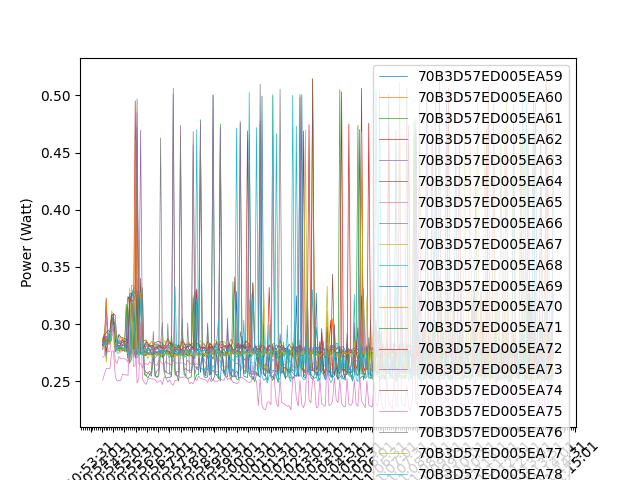

In [16]:
plt.figure()

for node_id, group in groups:
    idxs = np.linspace(0,len(group), 250, endpoint=False, dtype=int)

    subset = group["power"].iloc[idxs]
    plt.plot(subset.index, subset, label=node_id, linewidth=0.5)

plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.ylabel("Power (Watt)")
plt.gca().xaxis.set_major_locator(SecondLocator(interval=30))  # Set the major locator to display labels every 30 seconds
plt.gca().xaxis.set_minor_locator(SecondLocator(interval=5))  # Set the minor locator to display labels at millisecond level
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S')) 
#plt.gca().xaxis.set_minor_formatter(DateFormatter('%S.%f'))  
plt.legend()
plt.show()

In [17]:
groups["power"].get_group(deveui)

timestamp
2024-05-31 10:54:03.159987    0.281427
2024-05-31 10:54:03.161086    0.279596
2024-05-31 10:54:03.162184    0.282038
2024-05-31 10:54:03.163313    0.282038
2024-05-31 10:54:03.164412    0.279596
                                ...   
2024-05-31 11:14:08.997976    0.277154
2024-05-31 11:14:08.999105    0.277154
2024-05-31 11:14:09.000234    0.275933
2024-05-31 11:14:09.001333    0.276544
2024-05-31 11:14:09.002431    0.241136
Name: power, Length: 1086807, dtype: float64

## finding sync signals

In [18]:
BLINK_HIGH_MS = 200
BLINK_PRE_MS = 100
BLINK_POST_MS = 100

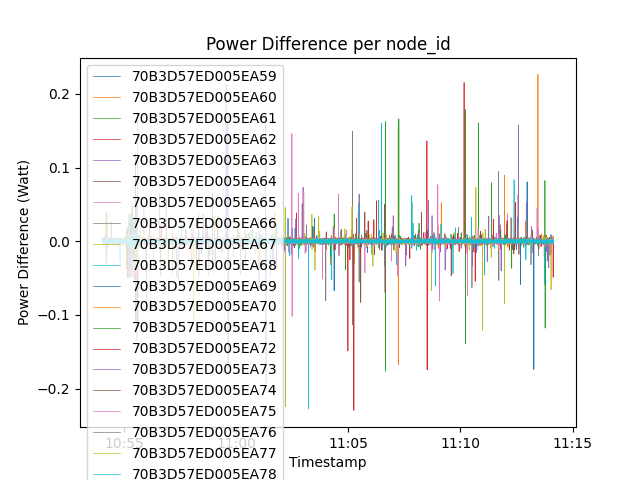

In [19]:
#diff of each group
power_consumption['power_diff'] = groups["power"].diff()

# single node
power_single = power_consumption[(power_consumption["node_id"] ==deveui)]
plt.figure()
for node_id, group in power_consumption.groupby("node_id"):
    idxs = np.linspace(0,len(group), 10000, endpoint=False, dtype=int) # there are comparatively few but big jumps, so hard to see when just taking "random" indexes
    subset = group["power_diff"].iloc[idxs]
    plt.plot(subset.index, subset, label=node_id, linewidth=0.5)
plt.title("Power Difference per node_id")
plt.xlabel("Timestamp")
plt.ylabel("Power Difference (Watt)")
plt.legend()
plt.show()

In [20]:
rising_edge = power_consumption[power_consumption["power_diff"] > 0.1].copy()
rising_edge.loc[:,'direction'] = 'rising'
falling_edge = power_consumption[power_consumption["power_diff"] < -0.1].copy()
falling_edge.loc[:,'direction'] = 'falling'
edges = pd.concat([rising_edge, falling_edge], verify_integrity=True)
edges.sort_index(inplace=True)
edges.head()

,power,current,voltage,node_id,power_diff,direction
timestamp,,,,,,
2024-05-31 10:55:27.239123,0.501808,0.102706,4.88375,70B3D57ED005EA71,0.165438,rising
2024-05-31 10:55:27.439478,0.275323,0.056285,4.88500,70B3D57ED005EA71,-0.172763,falling
2024-05-31 10:55:27.642061,0.501197,0.102657,4.88500,70B3D57ED005EA71,0.160554,rising
2024-05-31 10:55:27.842386,0.275933,0.056432,4.88750,70B3D57ED005EA71,-0.170932,falling
2024-05-31 10:55:27.889535,0.498755,0.103927,4.80125,70B3D57ED005EA70,0.220380,rising


In [21]:
# populate edges with next direction and timestamps to later filter out edges that are too close to each other.
# need the index as dedicated column for this to be possible as a groupby transformation
edges['timestamp'] = edges.index.copy()
edges['next_direction'] = edges.groupby('node_id')['direction'].shift(-1)
edges['next_timestamp'] = edges.groupby('node_id')['timestamp'].shift(-1)
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp
timestamp,,,,,,,,,
2024-05-31 10:55:27.239123,0.501808,0.102706,4.88375,70B3D57ED005EA71,0.165438,rising,2024-05-31 10:55:27.239123,falling,2024-05-31 10:55:27.439478
2024-05-31 10:55:27.439478,0.275323,0.056285,4.88500,70B3D57ED005EA71,-0.172763,falling,2024-05-31 10:55:27.439478,rising,2024-05-31 10:55:27.642061
2024-05-31 10:55:27.642061,0.501197,0.102657,4.88500,70B3D57ED005EA71,0.160554,rising,2024-05-31 10:55:27.642061,falling,2024-05-31 10:55:27.842386
2024-05-31 10:55:27.842386,0.275933,0.056432,4.88750,70B3D57ED005EA71,-0.170932,falling,2024-05-31 10:55:27.842386,falling,2024-05-31 10:55:29.575675
2024-05-31 10:55:27.889535,0.498755,0.103927,4.80125,70B3D57ED005EA70,0.220380,rising,2024-05-31 10:55:27.889535,falling,2024-05-31 10:55:28.089768


In [22]:
# now to filter out edges that are too close to each other or too far apart. We add 10% tolerance

# filter out edges that are too close to each other or too far apart. We add 10% tolerance
edges = edges[(edges['direction'] == "rising") & (edges['next_direction'] == "falling") & ((edges['next_timestamp'] - edges.index < pd.Timedelta(milliseconds=BLINK_HIGH_MS + (BLINK_HIGH_MS/10)))  & (edges['next_timestamp'] - edges.index > pd.Timedelta(milliseconds=BLINK_HIGH_MS - (BLINK_HIGH_MS/10))))]
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp
timestamp,,,,,,,,,
2024-05-31 10:55:27.239123,0.501808,0.102706,4.88375,70B3D57ED005EA71,0.165438,rising,2024-05-31 10:55:27.239123,falling,2024-05-31 10:55:27.439478
2024-05-31 10:55:27.642061,0.501197,0.102657,4.88500,70B3D57ED005EA71,0.160554,rising,2024-05-31 10:55:27.642061,falling,2024-05-31 10:55:27.842386
2024-05-31 10:55:27.889535,0.498755,0.103927,4.80125,70B3D57ED005EA70,0.220380,rising,2024-05-31 10:55:27.889535,falling,2024-05-31 10:55:28.089768
2024-05-31 10:55:28.292290,0.474336,0.098774,4.80000,70B3D57ED005EA70,0.197182,rising,2024-05-31 10:55:28.292290,falling,2024-05-31 10:55:28.492523
2024-05-31 10:55:29.403403,0.457243,0.095160,4.80750,70B3D57ED005EA62,0.175205,rising,2024-05-31 10:55:29.403403,falling,2024-05-31 10:55:29.604429


In [23]:
## add sync signal start and end times
edges.loc[:, 'sync_start'] = edges.index - pd.Timedelta(milliseconds=100)
edges.loc[:, 'sync_end'] = edges.next_timestamp + pd.Timedelta(milliseconds=100)
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp,sync_start,sync_end
timestamp,,,,,,,,,,,
2024-05-31 10:55:27.239123,0.501808,0.102706,4.88375,70B3D57ED005EA71,0.165438,rising,2024-05-31 10:55:27.239123,falling,2024-05-31 10:55:27.439478,2024-05-31 10:55:27.139123,2024-05-31 10:55:27.539478
2024-05-31 10:55:27.642061,0.501197,0.102657,4.88500,70B3D57ED005EA71,0.160554,rising,2024-05-31 10:55:27.642061,falling,2024-05-31 10:55:27.842386,2024-05-31 10:55:27.542061,2024-05-31 10:55:27.942386
2024-05-31 10:55:27.889535,0.498755,0.103927,4.80125,70B3D57ED005EA70,0.220380,rising,2024-05-31 10:55:27.889535,falling,2024-05-31 10:55:28.089768,2024-05-31 10:55:27.789535,2024-05-31 10:55:28.189768
2024-05-31 10:55:28.292290,0.474336,0.098774,4.80000,70B3D57ED005EA70,0.197182,rising,2024-05-31 10:55:28.292290,falling,2024-05-31 10:55:28.492523,2024-05-31 10:55:28.192290,2024-05-31 10:55:28.592523
2024-05-31 10:55:29.403403,0.457243,0.095160,4.80750,70B3D57ED005EA62,0.175205,rising,2024-05-31 10:55:29.403403,falling,2024-05-31 10:55:29.604429,2024-05-31 10:55:29.303403,2024-05-31 10:55:29.704429


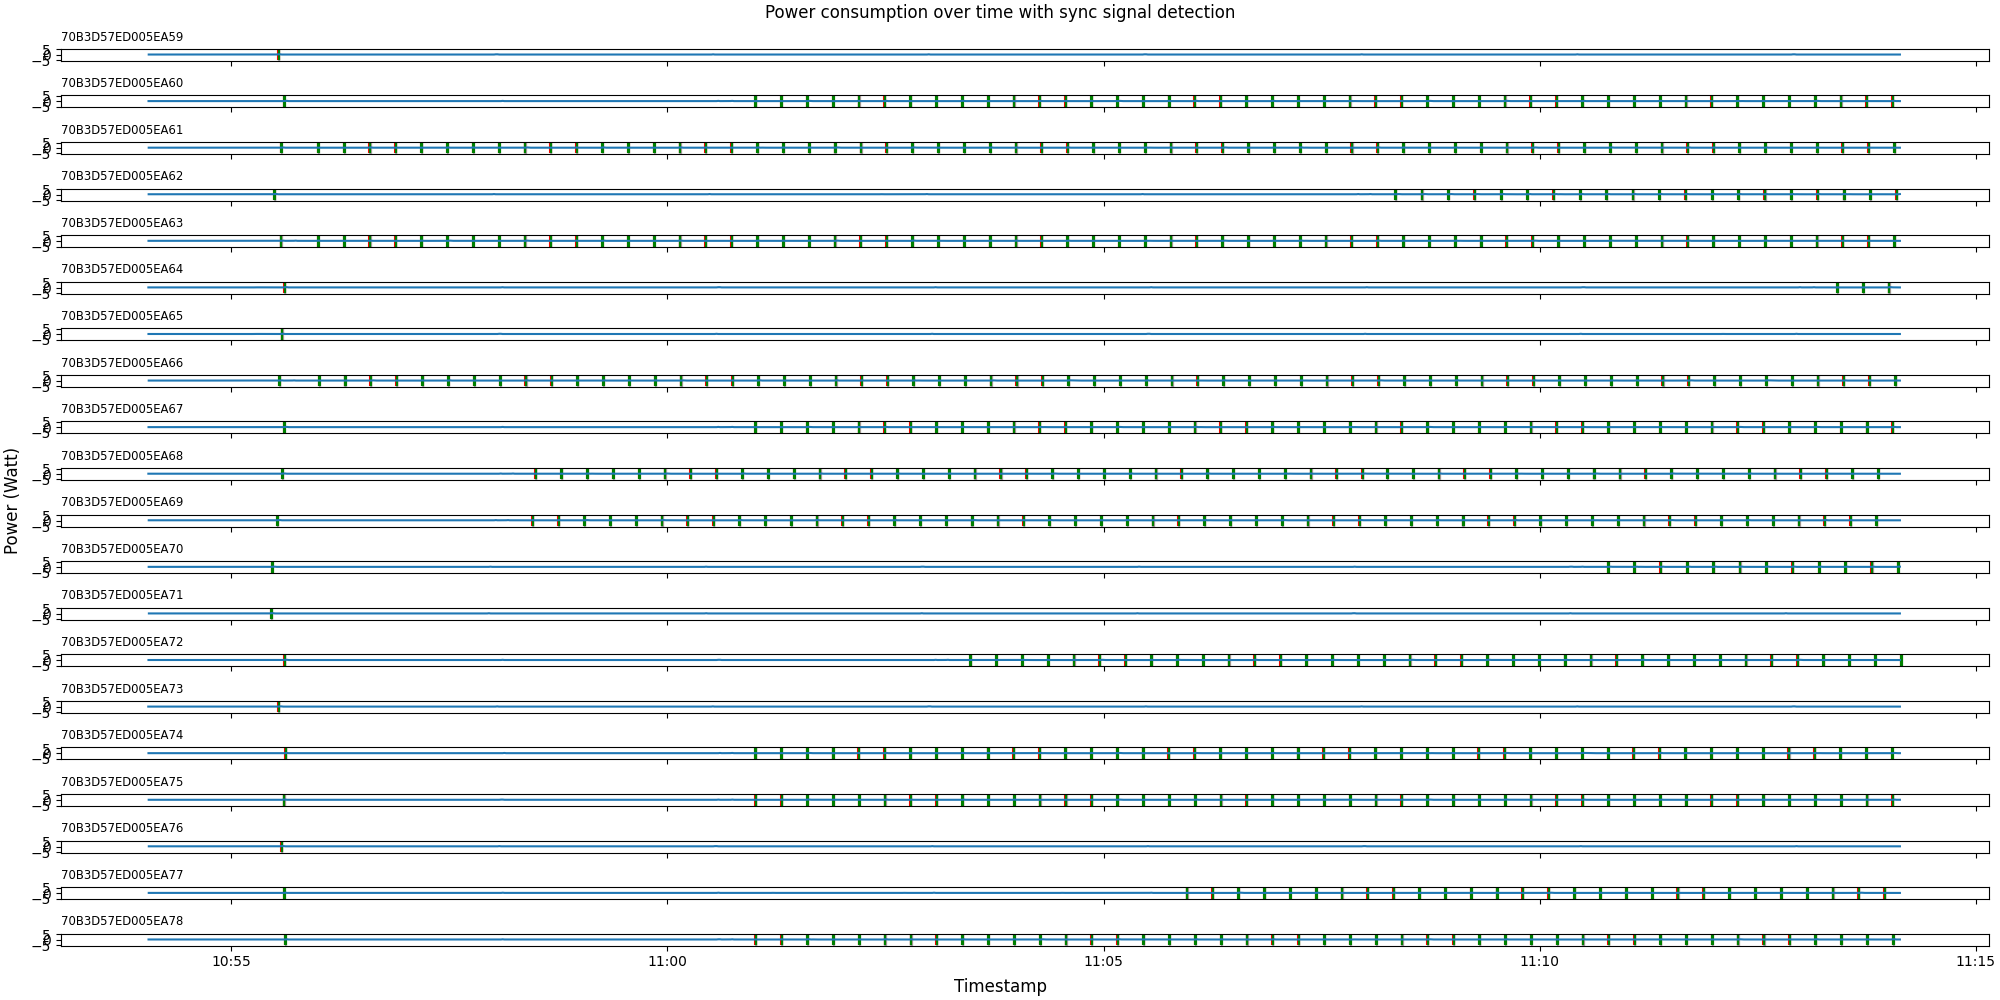

In [24]:
groups_by_node_id = power_consumption.groupby('node_id')
edges_by_node_id = edges.groupby('node_id')

fig, axs = plt.subplots(len(groups_by_node_id), 1, sharex=True, sharey=True, layout='constrained', figsize=(20, 10))
fig.supxlabel("Timestamp")
fig.supylabel("Power (Watt)")
fig.suptitle("Power consumption over time with sync signal detection")
for ((node_id, group), ax) in zip(groups_by_node_id, axs):
    if node_id in edges_by_node_id.groups:
        edges_grouped = edges_by_node_id.get_group(node_id)
        ax.vlines(edges_grouped['timestamp'], ymin=-5, ymax=5, color='red')
        ax.vlines(edges_grouped['next_timestamp'], ymin=-5, ymax=5, color='green')
        for row in edges_by_node_id.get_group(node_id).itertuples():
            ax.axvspan(row.sync_start, row.sync_end, color='grey', alpha=0.5)

    else:
        print(f"Node {node_id} has no edges")
    idxs = np.linspace(0, len(group), endpoint=False, num=1000, dtype=int)
    subset = group["power"].iloc[idxs]
    ax.plot(subset.index, subset, label=node_id)
    ax.set_title(node_id, fontsize='small', loc='left')
plt.show()

In [25]:
# every loop starts with 2 sync signals right after each other
# find all sync signals where the next start is very close to previous end
grouped = edges.groupby('node_id')
edges['next_sync_start'] = grouped['sync_start'].shift(-1)
edges['next_sync_end'] = grouped['sync_end'].shift(-1)
loops = edges[abs(edges['sync_end'] - edges['next_sync_start']) < pd.Timedelta(milliseconds=500)][['node_id', 'sync_start', 'next_sync_end']].copy()
loops.rename(columns={'sync_start': 'loop_signal_start', 'next_sync_end': 'loop_signal_end'}, inplace=True)
loops['loop_num'] = loops.groupby('node_id').cumcount()
loops[['node_id','loop_num']]


,node_id,loop_num
timestamp,,
2024-05-31 10:55:27.239123,70B3D57ED005EA71,0
2024-05-31 10:55:27.889535,70B3D57ED005EA70,0
2024-05-31 10:55:29.403403,70B3D57ED005EA62,0
2024-05-31 10:55:31.349866,70B3D57ED005EA69,0
2024-05-31 10:55:32.302365,70B3D57ED005EA59,0
...,...,...
2024-05-31 11:14:03.842751,70B3D57ED005EA61,62
2024-05-31 11:14:04.455055,70B3D57ED005EA66,62
2024-05-31 11:14:05.374214,70B3D57ED005EA62,20


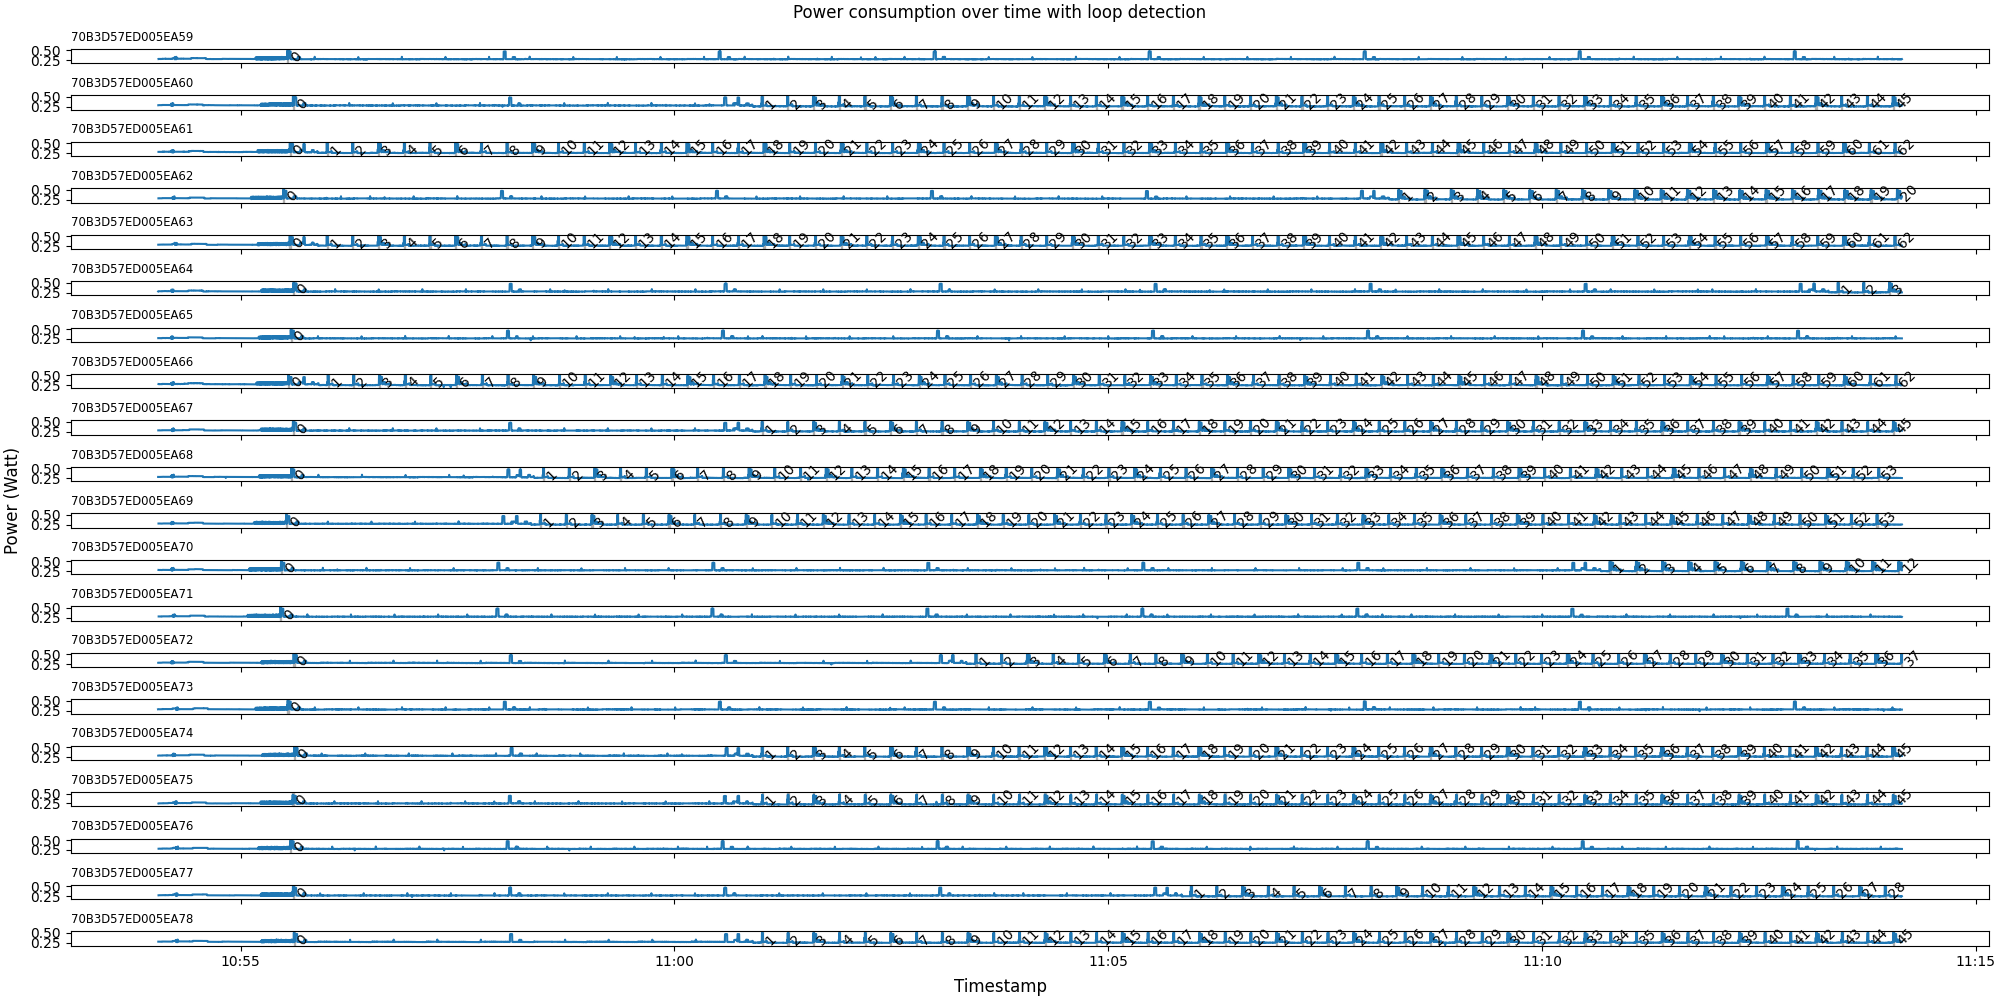

In [26]:

groups_by_node_id = power_consumption.groupby('node_id')
loops_by_node_id = loops.groupby('node_id')
fig, axs = plt.subplots(len(groups_by_node_id), 1, sharex=True, sharey=True, figsize=(20, 10), layout='constrained')

fig.supxlabel("Timestamp")
fig.supylabel("Power (Watt)")
fig.suptitle("Power consumption over time with loop detection")
for ((node_id, group), ax) in zip(groups_by_node_id, axs):
    if node_id in loops_by_node_id.groups:
        loops_group = loops_by_node_id.get_group(node_id)
        for row in loops_group.itertuples():
            ax.axvspan(row.loop_signal_start, row.loop_signal_end, color='tab:gray', alpha=0.5, label="loop signal")
            ax.text(row.loop_signal_end, 0.2, f"{row.loop_num}", rotation=45)
    else:
        print(f"Node {node_id} has no loops")
    idxs = np.linspace(0, len(group), endpoint=False, num=10000, dtype=int)
    subset = group["power"].iloc[idxs]

    ax.plot(subset.index, subset,label=node_id)
    ax.set_title(node_id, fontsize='small', loc='left')

plt.show()

In [27]:
# 'TIMINGS> Loop: 0, Sync: 806 ms, Load: 40 ms, sensor init: 10 ms, env init: 0 ms, net init: 5216 ms, Collect: -1 ms, Exec: -1 ms, Send: 5119 ms, save config: 2646 ms, Sleep: 9 s\n'
query = """
SELECT 
    node_id,
    timestamp,
    regexp_extract(message, 'Loop: (-?[0-9]+)',1) as loop_num,
    regexp_extract(message, '.*Sync: (-?[0-9]+)',1) as sync_time_ms,
    regexp_extract(message, '.*Load: (-?[0-9]+)',1) as load_time_ms,
    regexp_extract(message, '.*sensor init: (-?[0-9]+)',1) as sensor_init_time_ms,
    regexp_extract(message, '.*env init: (-?[0-9]+)',1) as env_init_time_ms,
    regexp_extract(message, '.*net init: (-?[0-9]+)',1) as net_init_time_ms,
    --regexp_extract(message, '.*Listen: (-?[0-9]+)',1) as listen_time_ms,
    regexp_extract(message, '.*Collect: (-?[0-9]+)',1) as collect_time_ms,
    regexp_extract(message, '.*Exec: (-?[0-9]+)',1) as exec_time_ms,
    regexp_extract(message, '.*Send: (-?[0-9]+)',1) as send_time_ms,
    regexp_extract(message, '.*save config: (-?[0-9]+)',1) as save_config_time_ms,
    regexp_extract(message, '.*Sleep: (-?[0-9]+)',1) as sleep_time_s
FROM expdb.Trace
WHERE message LIKE 'TIMINGS>%'
"""
timings = %sql {{query}}
timings['node_id'].unique()

Running query in 'duckdb'

array(['70B3D57ED005EA63', '70B3D57ED005EA61', '70B3D57ED005EA66',
       '70B3D57ED005EA69', '70B3D57ED005EA68', '70B3D57ED005EA74',
       '70B3D57ED005EA60', '70B3D57ED005EA67', '70B3D57ED005EA75',
       '70B3D57ED005EA78', '70B3D57ED005EA72', '70B3D57ED005EA77',
       '70B3D57ED005EA62', '70B3D57ED005EA70', '70B3D57ED005EA64'],
      dtype=object)

In [28]:
# since duckdb return all columns as object we need to change types before we can merge
timings[['loop_num', 'sync_time_ms', 'load_time_ms', 'sensor_init_time_ms', 'env_init_time_ms', 'net_init_time_ms', 'collect_time_ms', 'exec_time_ms', 'send_time_ms', 'save_config_time_ms', 'sleep_time_s']] = timings[['loop_num', 'sync_time_ms', 'load_time_ms', 'sensor_init_time_ms', 'env_init_time_ms', 'net_init_time_ms', 'collect_time_ms', 'exec_time_ms', 'send_time_ms', 'save_config_time_ms', 'sleep_time_s']].apply(pd.to_numeric)

# .. and merge. here we need to reset index first, since df.merge doesnt preserve index
loops = loops.reset_index().merge(timings, on=['node_id', 'loop_num']).set_index('loop_signal_start')
loops.head()

,timestamp_x,node_id,loop_signal_end,loop_num,timestamp_y,sync_time_ms,load_time_ms,sensor_init_time_ms,env_init_time_ms,net_init_time_ms,collect_time_ms,exec_time_ms,send_time_ms,save_config_time_ms,sleep_time_s
loop_signal_start,,,,,,,,,,,,,,,
2024-05-31 10:55:27.789535,2024-05-31 10:55:27.889535,70B3D57ED005EA70,2024-05-31 10:55:28.592523,0,2024-05-31 11:10:40.458314,806,21,26,0,900595,0,-1,7892,1254,6
2024-05-31 10:55:29.303403,2024-05-31 10:55:29.403403,70B3D57ED005EA62,2024-05-31 10:55:30.106482,0,2024-05-31 11:08:14.274966,806,21,25,0,752901,0,-1,7892,1257,6
2024-05-31 10:55:31.249866,2024-05-31 10:55:31.349866,70B3D57ED005EA69,2024-05-31 10:55:32.051908,0,2024-05-31 10:58:20.791883,806,21,26,0,158120,0,-1,7887,602,6
2024-05-31 10:55:32.765114,2024-05-31 10:55:32.865114,70B3D57ED005EA66,2024-05-31 10:55:33.567980,0,2024-05-31 10:55:53.867424,806,21,26,0,9496,0,-1,8071,602,6
2024-05-31 10:55:33.747703,2024-05-31 10:55:33.847703,70B3D57ED005EA63,2024-05-31 10:55:34.550904,0,2024-05-31 10:55:53.203792,806,21,26,0,8512,0,-1,7409,601,6


In [29]:

loops["start_time"] = loops.index
loops["sync_start"] = loops["start_time"]
loops["sync_end"] = loops["sync_start"] + pd.to_timedelta(loops["sync_time_ms"], unit="ms")
loops["load_start"] = loops["sync_end"]
loops["load_end"] = loops["load_start"] + pd.to_timedelta(loops["load_time_ms"], unit="ms")
loops["sensor_init_start"] = loops["load_end"]
loops["sensor_init_end"] = loops["sensor_init_start"] + pd.to_timedelta(loops["sensor_init_time_ms"], unit="ms")
loops["env_init_start"] = loops["sensor_init_end"]
loops["env_init_end"] = loops["env_init_start"] + pd.to_timedelta(loops["env_init_time_ms"], unit="ms")
loops["net_init_start"] = loops["env_init_end"]
loops["net_init_end"] = loops["net_init_start"] + pd.to_timedelta(loops["net_init_time_ms"], unit="ms")
loops["collect_time_start"] = loops["net_init_end"]
loops["collect_time_end"] = loops["collect_time_start"] +pd.to_timedelta(loops["collect_time_ms"], unit="ms")
loops["exec_start"] = loops["collect_time_end"]
loops["exec_end"] = loops["exec_start"] + pd.to_timedelta(loops["exec_time_ms"], unit="ms")
loops["send_start"] = loops["exec_end"]
loops["send_end"] = loops["send_start"] +pd.to_timedelta(loops["send_time_ms"], unit="ms")
loops["save_config_start"] = loops["send_end"]
loops["save_config_end"] = loops["save_config_start"] + pd.to_timedelta(loops["save_config_time_ms"], unit="ms")
loops["sleep_start"] = loops["save_config_end"]
loops["sleep_end"] = loops["sleep_start"] + pd.to_timedelta(loops["sleep_time_s"], unit="s")

loops.replace(-1,0) # remove -1 values. They show up if the time measurement is not available



,timestamp_x,node_id,loop_signal_end,loop_num,timestamp_y,sync_time_ms,load_time_ms,sensor_init_time_ms,env_init_time_ms,net_init_time_ms,...,collect_time_start,collect_time_end,exec_start,exec_end,send_start,send_end,save_config_start,save_config_end,sleep_start,sleep_end
loop_signal_start,,,,,,,,,,,,,,,,,,,,,
2024-05-31 10:55:27.789535,2024-05-31 10:55:27.889535,70B3D57ED005EA70,2024-05-31 10:55:28.592523,0,2024-05-31 11:10:40.458314,806,21,26,0,900595,...,2024-05-31 11:10:29.237535,2024-05-31 11:10:29.237535,2024-05-31 11:10:29.237535,2024-05-31 11:10:29.236535,2024-05-31 11:10:29.236535,2024-05-31 11:10:37.128535,2024-05-31 11:10:37.128535,2024-05-31 11:10:38.382535,2024-05-31 11:10:38.382535,2024-05-31 11:10:44.382535
2024-05-31 10:55:29.303403,2024-05-31 10:55:29.403403,70B3D57ED005EA62,2024-05-31 10:55:30.106482,0,2024-05-31 11:08:14.274966,806,21,25,0,752901,...,2024-05-31 11:08:03.056403,2024-05-31 11:08:03.056403,2024-05-31 11:08:03.056403,2024-05-31 11:08:03.055403,2024-05-31 11:08:03.055403,2024-05-31 11:08:10.947403,2024-05-31 11:08:10.947403,2024-05-31 11:08:12.204403,2024-05-31 11:08:12.204403,2024-05-31 11:08:18.204403
2024-05-31 10:55:31.249866,2024-05-31 10:55:31.349866,70B3D57ED005EA69,2024-05-31 10:55:32.051908,0,2024-05-31 10:58:20.791883,806,21,26,0,158120,...,2024-05-31 10:58:10.222866,2024-05-31 10:58:10.222866,2024-05-31 10:58:10.222866,2024-05-31 10:58:10.221866,2024-05-31 10:58:10.221866,2024-05-31 10:58:18.108866,2024-05-31 10:58:18.108866,2024-05-31 10:58:18.710866,2024-05-31 10:58:18.710866,2024-05-31 10:58:24.710866
2024-05-31 10:55:32.765114,2024-05-31 10:55:32.865114,70B3D57ED005EA66,2024-05-31 10:55:33.567980,0,2024-05-31 10:55:53.867424,806,21,26,0,9496,...,2024-05-31 10:55:43.114114,2024-05-31 10:55:43.114114,2024-05-31 10:55:43.114114,2024-05-31 10:55:43.113114,2024-05-31 10:55:43.113114,2024-05-31 10:55:51.184114,2024-05-31 10:55:51.184114,2024-05-31 10:55:51.786114,2024-05-31 10:55:51.786114,2024-05-31 10:55:57.786114
2024-05-31 10:55:33.747703,2024-05-31 10:55:33.847703,70B3D57ED005EA63,2024-05-31 10:55:34.550904,0,2024-05-31 10:55:53.203792,806,21,26,0,8512,...,2024-05-31 10:55:43.112703,2024-05-31 10:55:43.112703,2024-05-31 10:55:43.112703,2024-05-31 10:55:43.111703,2024-05-31 10:55:43.111703,2024-05-31 10:55:50.520703,2024-05-31 10:55:50.520703,2024-05-31 10:55:51.121703,2024-05-31 10:55:51.121703,2024-05-31 10:55:57.121703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 11:13:56.904140,2024-05-31 11:13:57.004140,70B3D57ED005EA77,2024-05-31 11:13:57.707677,28,2024-05-31 11:14:00.475267,806,22,25,0,55,...,2024-05-31 11:13:57.812140,2024-05-31 11:13:57.812140,2024-05-31 11:13:57.812140,2024-05-31 11:13:57.811140,2024-05-31 11:13:57.811140,2024-05-31 11:13:57.861140,2024-05-31 11:13:57.861140,2024-05-31 11:13:58.394140,2024-05-31 11:13:58.394140,2024-05-31 11:14:12.394140
2024-05-31 11:13:59.913922,2024-05-31 11:14:00.013922,70B3D57ED005EA64,2024-05-31 11:14:00.717276,3,2024-05-31 11:14:07.520542,806,22,25,0,55,...,2024-05-31 11:14:00.821922,2024-05-31 11:14:00.821922,2024-05-31 11:14:00.821922,2024-05-31 11:14:00.820922,2024-05-31 11:14:00.820922,2024-05-31 11:14:04.903922,2024-05-31 11:14:04.903922,2024-05-31 11:14:05.436922,2024-05-31 11:14:05.436922,2024-05-31 11:14:15.436922
2024-05-31 11:14:03.665962,2024-05-31 11:14:03.765962,70B3D57ED005EA63,2024-05-31 11:14:04.469225,62,2024-05-31 11:14:07.237080,806,22,25,0,55,...,2024-05-31 11:14:04.573962,2024-05-31 11:14:04.573962,2024-05-31 11:14:04.573962,2024-05-31 11:14:04.572962,2024-05-31 11:14:04.572962,2024-05-31 11:14:04.622962,2024-05-31 11:14:04.622962,2024-05-31 11:14:05.154962,2024-05-31 11:14:05.154962,2024-05-31 11:14:19.154962


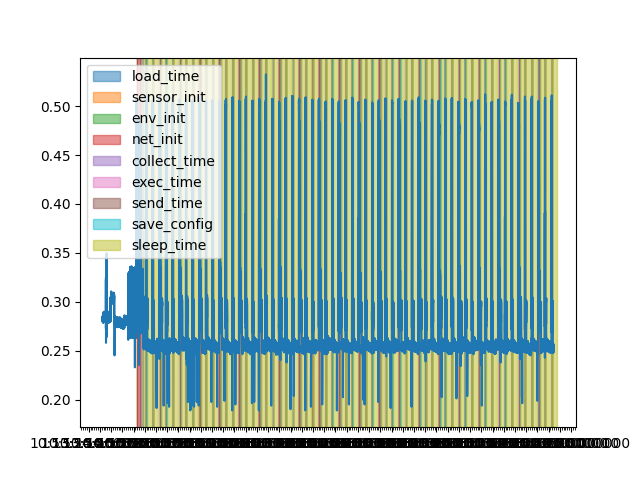

In [55]:
node_id = "70B3D57ED005EA61"
timing_data = loops[loops["node_id"] == node_id]
power_data = power_consumption[power_consumption["node_id"] == node_id]

plt.figure()
plt.plot(power_data.index, power_data["power"])
for row in timing_data.itertuples():
    plt.axvspan(row.load_start, row.load_end, color='tab:blue', alpha=0.5, label="load_time")
    plt.axvspan(row.sensor_init_start, row.sensor_init_end, color='tab:orange', alpha=0.5, label="sensor_init")
    plt.axvspan(row.env_init_start, row.env_init_end, color='tab:green', alpha=0.5, label="env_init")
    plt.axvspan(row.net_init_start, row.net_init_end, color='tab:red', alpha=0.5, label="net_init")
    plt.axvspan(row.collect_time_start, row.collect_time_end, color='tab:purple', alpha=0.5, label="collect_time")
    plt.axvspan(row.exec_start, row.exec_end, color='tab:pink', alpha=0.5, label="exec_time")
    plt.axvspan(row.send_start, row.send_end, color='tab:brown', alpha=0.5, label="send_time")
    plt.axvspan(row.save_config_start, row.save_config_end, color='tab:cyan', alpha=0.5, label="save_config")
    plt.axvspan(row.sleep_start, row.sleep_end, color='tab:olive', alpha=0.5, label="sleep_time")
# this to remove duplicate labels https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.gca().xaxis.set_major_locator(SecondLocator(interval=30))
plt.gca().xaxis.set_minor_locator(SecondLocator(interval=5))

plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S.%f'))  # Set the date format for the tick labels
plt.show()


## Add events if any

In [31]:
# get all relevant frame-events
%sql send_frame_start << select * from expdb.Trace WHERE message LIKE '%send frame%'
%sql send_frame_end << select * from expdb.Trace WHERE message LIKE '%Transmission completed%'
%sql receive_frame_start << select * from expdb.Trace WHERE message LIKE '%RX started%'
%sql receive_frame_end << select * from expdb.Trace WHERE message LIKE '%received something%'

print(f"{len(send_frame_start)} send frame start events. {len(send_frame_end)} end events. {len(receive_frame_start)} receive frame start events. {len(receive_frame_end)} end events.")

Running query in 'duckdb'

Running query in 'duckdb'

Running query in 'duckdb'

Running query in 'duckdb'

0 send frame start events. 0 end events. 0 receive frame start events. 0 end events.


In [32]:
#drop first row of send_frame_end and receive_frame_start since thats from the join procedure
send_frame_end = send_frame_end.iloc[1:]
receive_frame_start = receive_frame_start.iloc[1:]

# confirm the 2 pairs of start/end all have the same length
assert len(send_frame_start) == len(send_frame_end), f"send frame event mismatch. start {len(send_frame_start)}, end { len(send_frame_end)}"
assert len(receive_frame_start) == len(receive_frame_end), f"receive frame event mismatch  {len(receive_frame_start)}, end { len(receive_frame_end)}"

In [33]:
# add send and receive columns to plot
#TODO: update this to support more nodes
# for send_start_row, send_end_row in zip(send_frame_start.itertuples(), send_frame_end.itertuples()):
#     start_time = send_start_row.timestamp
#     end_time = send_end_row.timestamp
#     plt.axvspan(start_time, end_time, color='tab:pink', alpha=0.5, label="send_events")

# for receive_frame_start, receive_frame_end in zip(receive_frame_start.itertuples(), receive_frame_end.itertuples()):
#     start_time = receive_frame_start.timestamp
#     end_time = receive_frame_end.timestamp
#     plt.axvspan(start_time, end_time, color='tab:brown', alpha=0.5, label="receive_events")


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

# plt.show()

In [34]:
%sql SELECT * from expdb.Content_Message

Running query in 'duckdb'

,content_message_id,frame_counter,frame_port,frame_payload
0,1,0,2,PDM=
1,2,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
2,3,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
3,4,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
4,5,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
...,...,...,...,...
170,195,1,2,PDM=
171,196,20,2,CgA=
172,197,12,2,CgA=
173,198,18,2,PDM=


In [35]:
%%sql
SELECT
    through_gateway,
    gateway_received_at,
    app_received_at,
    rssi,
    snr,
    bandwidth,
    frequency,
    consumed_airtime_s,
    spreading_factor,
    coding_rate,
    frame_counter,
    frame_port,
    frame_payload,
    from_base64(frame_payload) as decoded_payload,
    related_node,
    network_received_at
FROM
    expdb.Uplink_Message,
    expdb.Content_Message,
    expdb.Message 
WHERE
    Uplink_Message.uplink_message_id = Message.message_id AND
    Content_Message.content_message_id = Message.message_id

Running query in 'duckdb'

,through_gateway,gateway_received_at,app_received_at,rssi,snr,bandwidth,frequency,consumed_airtime_s,spreading_factor,coding_rate,frame_counter,frame_port,frame_payload,decoded_payload,related_node,network_received_at
0,iot-lab-saclay-gateway,2024-05-31 08:55:44,2024-05-31 08:55:45.129383,-29,7.00,125000,867500000,1.155072,SF12,4/5,0,2,PDM=,"[60, 51]",70B3D57ED005EA61,2024-05-31 08:55:44.925168
1,iot-lab-saclay-gateway,2024-05-31 08:56:37,2024-05-31 08:56:37.423272,-30,5.75,125000,868100000,1.155072,SF12,4/5,1,2,PDM=,"[60, 51]",70B3D57ED005EA61,2024-05-31 08:56:37.215931
2,iot-lab-saclay-gateway,2024-05-31 08:57:31,2024-05-31 08:57:30.979246,-30,6.00,125000,868300000,1.155072,SF12,4/5,2,2,PDM=,"[60, 51]",70B3D57ED005EA61,2024-05-31 08:57:30.775639
3,gw-tetech-test,2024-05-31 08:58:11,2024-05-31 08:58:11.747604,-125,-10.20,125000,867100000,1.155072,SF12,4/5,0,2,PDM=,"[60, 51]",70B3D57ED005EA69,2024-05-31 08:58:11.541877
4,gw-tetech-test,2024-05-31 08:58:14,2024-05-31 08:58:14.256006,-124,-11.50,125000,867300000,1.155072,SF12,4/5,0,2,PDM=,"[60, 51]",70B3D57ED005EA68,2024-05-31 08:58:14.047050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,gw-tetech-test,2024-05-31 09:05:52,2024-05-31 09:05:52.771893,-120,-3.00,125000,868300000,1.155072,SF12,4/5,3,2,PDM=,"[60, 51]",70B3D57ED005EA72,2024-05-31 09:05:52.564578
108,gw-tetech-test,2024-05-31 09:10:37,2024-05-31 09:10:38.187843,-127,-9.80,125000,868100000,1.155072,SF12,4/5,14,2,PDM=,"[60, 51]",70B3D57ED005EA69,2024-05-31 09:10:37.978684
109,gw-tetech-test,2024-05-31 09:14:07,2024-05-31 09:14:08.052629,-116,-5.80,125000,868300000,1.155072,SF12,4/5,20,2,CgA=,"[10, 0]",70B3D57ED005EA62,2024-05-31 09:14:07.841295
110,gw-tetech-test,2024-05-31 09:08:41,2024-05-31 09:08:41.403268,-120,-5.20,125000,868300000,1.155072,SF12,4/5,2,2,CgA=,"[10, 0]",70B3D57ED005EA62,2024-05-31 09:08:41.193581


## experiment stats
with sync signals and events mapped we can see some stats on the experiments

In [36]:
%%sql
select * from expdb.Node

Running query in 'duckdb'

,node_deveui,node_appeui,node_appkey,board_id,radio_chipset,node_site,profile,riot_board,failed
0,70B3D57ED005EA59,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
1,70B3D57ED005EA60,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
2,70B3D57ED005EA61,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
3,70B3D57ED005EA62,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
4,70B3D57ED005EA63,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
5,70B3D57ED005EA64,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
6,70B3D57ED005EA65,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
7,70B3D57ED005EA66,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
8,70B3D57ED005EA67,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
9,70B3D57ED005EA68,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0


In [37]:
loops.groupby('node_id')['loop_num'].max()

node_id
70B3D57ED005EA60    44
70B3D57ED005EA61    62
70B3D57ED005EA62    19
70B3D57ED005EA63    62
70B3D57ED005EA64     3
70B3D57ED005EA66    62
70B3D57ED005EA67    44
70B3D57ED005EA68    53
70B3D57ED005EA69    53
70B3D57ED005EA70    11
70B3D57ED005EA72    36
70B3D57ED005EA74    44
70B3D57ED005EA75    44
70B3D57ED005EA77    28
70B3D57ED005EA78    44
Name: loop_num, dtype: int64

## Calculate Total Energy Consumed per region

In [38]:
np.sum((np.abs(np.diff(power_consumption.index.to_numpy())) / np.timedelta64(1, 's')) * power_consumption["power"].values[:-1])

12894.190844841209

In [39]:
#define function to calculate energy consumed

def calc_energy_consumed(df: pd.DataFrame):

    # create a copy of the dataframe with only index and power
    if len(df) == 0:
        return 0
    #     # ensure we only calculate for data frames containing data from a single node
    # assert len(df["node_id"].unique()) == 1, "energy consumption only supported for single node"

    # # assert df have columns "power" and index of "timestamp" type
    # assert "power" in df.columns, "power column not found"
    # assert isinstance(df.index, pd.DatetimeIndex), "index is not  of type pd.DatetimeIndex"
    times = df.index.array
    powers = df["power"].values

    #power["power_diff"] = power.diff().shift(-1) #  current - previous, shifted one back so it becomes next - current. i.e. current + diff = next
    time_diff= np.abs(np.diff(times)) # abs(next-current)
    time_diff_s = time_diff / np.timedelta64(1, 's') # get timediff in fractions of a second
    powers = powers[:-1] # drop last row since it has no next and doesnt match up with the time_diff
    return np.sum(powers * time_diff_s) # returns the sum of power times fractions of a second. Since power is in W and time_diff_s is in seconds it is in W*s or J


In [40]:
# loops contain the start and end times of each activity, so loop over loops and calculate the energy for each activity
def calc_energy_consumed_per_activity(series_loops: pd.Series) -> pd.Series:
    power_consumption_for_node = power_consumption[(power_consumption["node_id"] == series_loops["node_id"])]
    return pd.Series({
        "node_id": series_loops["node_id"],
        "loop_num": series_loops["loop_num"],
        "total": calc_energy_consumed(power_consumption_for_node.loc[series_loops.name:series_loops["sleep_end"]]),
        "loop signal": calc_energy_consumed(power_consumption_for_node.loc[series_loops.name:series_loops["loop_signal_end"]]),
        "total without loop signal": calc_energy_consumed(power_consumption_for_node.loc[series_loops["loop_signal_end"]:series_loops["sleep_end"]]),
        "load config": calc_energy_consumed(power_consumption_for_node.loc[series_loops["load_start"]:series_loops["load_end"]]),
        "sensor init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["sensor_init_start"]:series_loops["sensor_init_end"]]),
        "env init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["env_init_start"]:series_loops["env_init_end"]]),
        "net init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["net_init_start"]:series_loops["net_init_end"]]),
        "sensor collect": calc_energy_consumed(power_consumption_for_node.loc[series_loops["collect_time_start"]:series_loops["collect_time_end"]]),
        "query execution": calc_energy_consumed(power_consumption_for_node.loc[series_loops["exec_start"]:series_loops["exec_end"]]),
        "send": calc_energy_consumed(power_consumption_for_node.loc[series_loops["send_start"]:series_loops["send_end"]]),
        "save config": calc_energy_consumed(power_consumption_for_node.loc[series_loops["save_config_start"]:series_loops["save_config_end"]]),
        "sleep": calc_energy_consumed(power_consumption_for_node.loc[series_loops["sleep_start"]:series_loops["sleep_end"]]),
    })
energy_consumed = loops.apply(calc_energy_consumed_per_activity, axis=1)
energy_consumed_summary = energy_consumed.describe()
energy_consumed_summary

,loop_num,total,loop signal,total without loop signal,load config,sensor init,env init,net init,sensor collect,query execution,send,save config,sleep
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.0,624.000000,624.0,624.000000,624.000000,624.000000,624.000000
mean,24.046474,6.770536,0.311833,6.458383,0.006039,0.007001,0.0,2.532732,0.0,0.001661,0.550067,0.149080,3.209491
std,15.982818,20.956837,0.007251,20.956918,0.000191,0.000222,0.0,20.911029,0.0,0.007398,0.717306,0.012419,0.583526
min,0.000000,1.362318,0.286243,1.049270,0.005552,0.006386,0.0,0.014077,0.0,0.000000,0.012871,0.132290,0.855770
25%,10.000000,4.127926,0.310784,3.816041,0.005930,0.006900,0.0,0.015623,0.0,0.000000,0.014307,0.147096,2.638474
50%,22.500000,4.206430,0.312832,3.887850,0.006040,0.007012,0.0,0.015753,0.0,0.000000,0.014553,0.148746,3.609350
75%,36.000000,4.491865,0.315632,4.180616,0.006191,0.007122,0.0,0.015961,0.0,0.000000,1.390648,0.150501,3.670827
max,62.000000,296.078813,0.322224,295.768892,0.006468,0.007740,0.0,291.469927,0.0,0.035131,2.531468,0.348139,3.747419


In [41]:
import scipy.stats as st
def calc_confidence_interval(series: pd.Series) -> pd.Series:
    assert "mean" in series.index, "mean not in index"
    assert "std" in series.index, "std not in index"
    if series["mean"] == 0 or series["std"] == 0:
        return pd.Series({
            "low": 0,
            "high": 0
        })
    low, high = st.norm.interval(0.95, loc=series["mean"], scale=series["std"])
    return pd.Series({
        "low": low,
        "high": high
    })



In [42]:
energy_consumed_summary

,loop_num,total,loop signal,total without loop signal,load config,sensor init,env init,net init,sensor collect,query execution,send,save config,sleep
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.0,624.000000,624.0,624.000000,624.000000,624.000000,624.000000
mean,24.046474,6.770536,0.311833,6.458383,0.006039,0.007001,0.0,2.532732,0.0,0.001661,0.550067,0.149080,3.209491
std,15.982818,20.956837,0.007251,20.956918,0.000191,0.000222,0.0,20.911029,0.0,0.007398,0.717306,0.012419,0.583526
min,0.000000,1.362318,0.286243,1.049270,0.005552,0.006386,0.0,0.014077,0.0,0.000000,0.012871,0.132290,0.855770
25%,10.000000,4.127926,0.310784,3.816041,0.005930,0.006900,0.0,0.015623,0.0,0.000000,0.014307,0.147096,2.638474
50%,22.500000,4.206430,0.312832,3.887850,0.006040,0.007012,0.0,0.015753,0.0,0.000000,0.014553,0.148746,3.609350
75%,36.000000,4.491865,0.315632,4.180616,0.006191,0.007122,0.0,0.015961,0.0,0.000000,1.390648,0.150501,3.670827
max,62.000000,296.078813,0.322224,295.768892,0.006468,0.007740,0.0,291.469927,0.0,0.035131,2.531468,0.348139,3.747419


In [43]:
errors = energy_consumed_summary.apply(calc_confidence_interval)
errors = np.abs(errors)
errors

,loop_num,total,loop signal,total without loop signal,load config,sensor init,env init,net init,sensor collect,query execution,send,save config,sleep
low,7.279274,34.304109,0.297620,34.616421,0.005666,0.006566,0,38.452132,0,0.012838,0.855826,0.124739,2.065802
high,55.372223,47.845182,0.326045,47.533187,0.006412,0.007436,0,43.517596,0,0.016160,1.955960,0.173420,4.353180


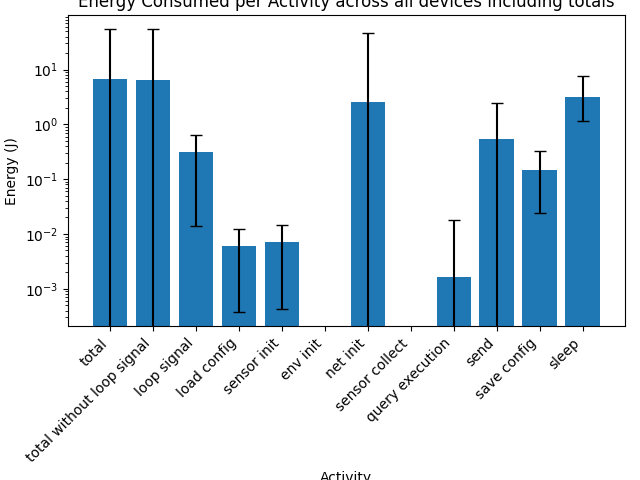

In [44]:
# plot barchart with stddev error bars
plt.figure()
to_plot = energy_consumed_summary[["total", "total without loop signal", "loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
errors = errors[["total", "total without loop signal", "loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors, log=True,capsize=4)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices including totals")
plt.show()

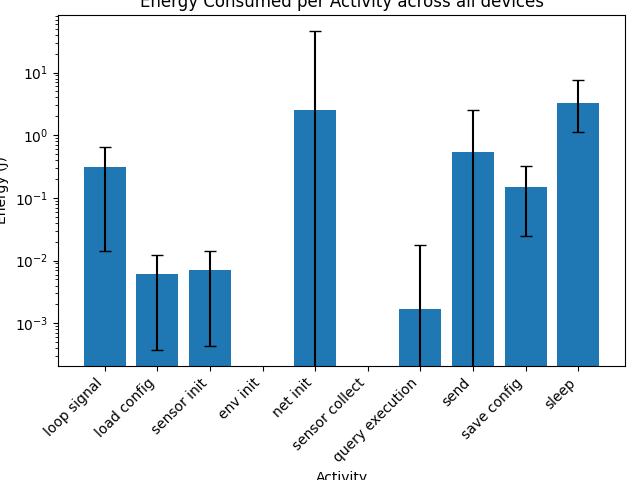

In [45]:
# plot barchart without totals 
plt.figure()
to_plot = energy_consumed_summary[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
errors = errors[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors, log=True, capsize=4)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices")
plt.show()

In [46]:
# plot barchart without totals and without the 0th loop
# recalc summary without 0 loops
without_0th_loop = loops[loops["loop_num"] > 0].apply(calc_energy_consumed_per_activity, axis=1)
without_0th_loop_summary = without_0th_loop.describe()

In [47]:
errors_with_0th_loop = without_0th_loop_summary.apply(calc_confidence_interval)
errors_with_0th_loop = np.abs(errors_with_0th_loop)
errors_with_0th_loop

,loop_num,total,loop signal,total without loop signal,load config,sensor init,env init,net init,sensor collect,query execution,send,save config,sleep
low,6.172962,3.664288,0.297621,3.357368,0.005682,0.006570,0,0.014858,0,0.012966,0.791284,0.139392,2.207653
high,55.450466,4.827224,0.326064,4.509817,0.006410,0.007421,0,0.016559,0,0.016370,1.798092,0.156665,4.291138


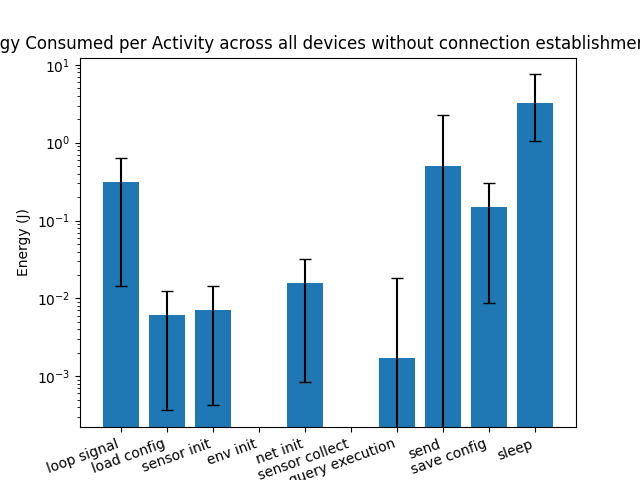

In [48]:
to_plot = without_0th_loop_summary[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
errors = errors_with_0th_loop[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
#energy_consumed_without_0th_loop
plt.figure()
plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors, capsize=4, log=True)
plt.xticks(rotation=20, ha="right")

plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices without connection establishment loop")
plt.show()

In [49]:
without_0th_loop.groupby("node_id").describe()

loop_num                                                  \
                    count  mean        std  min    25%   50%    75%   max   
node_id                                                                     
70B3D57ED005EA60     44.0  22.5  12.845233  1.0  11.75  22.5  33.25  44.0   
70B3D57ED005EA61     62.0  31.5  18.041619  1.0  16.25  31.5  46.75  62.0   
70B3D57ED005EA62     19.0  10.0   5.627314  1.0   5.50  10.0  14.50  19.0   
70B3D57ED005EA63     62.0  31.5  18.041619  1.0  16.25  31.5  46.75  62.0   
70B3D57ED005EA64      3.0   2.0   1.000000  1.0   1.50   2.0   2.50   3.0   
70B3D57ED005EA66     62.0  31.5  18.041619  1.0  16.25  31.5  46.75  62.0   
70B3D57ED005EA67     44.0  22.5  12.845233  1.0  11.75  22.5  33.25  44.0   
70B3D57ED005EA68     53.0  27.0  15.443445  1.0  14.00  27.0  40.00  53.0   
70B3D57ED005EA69     53.0  27.0  15.443445  1.0  14.00  27.0  40.00  53.0   
70B3D57ED005EA70     11.0   6.0   3.316625  1.0   3.50   6.0   8.50  11.0   
70B3D57ED005EA72     36.0  18.5  10.535654  1.0   9.75  18.5  27.25  36.0   
70B3D57ED005EA74     44.0  22.5  12.845233  1.0  11.75  22.5  33.25  44.0   
70B3D57ED005EA75     44.0  22.5  12.845233  1.0  11.75  22.5  33.25  44.0   
70B3D57ED005EA77     28.0  14.5   8.225975  1.0   7.75  14.5  21.25  28.0   
70B3D57ED005EA78     44.0  22.5  12.845233  1.0  11.75  22.5  33.25  44.0   

                 total            ... save config           sleep            \
                 count      mean  ...         75%       max count      mean   
node_id                           ...                                         
70B3D57ED005EA60  44.0  4.329628  ...    0.152120  0.154041  44.0  3.366081   
70B3D57ED005EA61  62.0  4.203394  ...    0.148243  0.149227  62.0  3.250979   
70B3D57ED005EA62  19.0  4.511672  ...    0.148516  0.149867  19.0  2.608401   
70B3D57ED005EA63  62.0  4.251921  ...    0.150316  0.151206  62.0  3.295306   
70B3D57ED005EA64   3.0  3.677850  ...    0.147156  0.147490   3.0  2.716102   
70B3D57ED005EA66  62.0  4.230253  ...    0.149630  0.150957  62.0  3.277428   
70B3D57ED005EA67  44.0  4.350865  ...    0.154019  0.155256  44.0  3.387383   
70B3D57ED005EA68  53.0  4.313562  ...    0.151626  0.152017  53.0  3.351526   
70B3D57ED005EA69  53.0  4.231749  ...    0.147368  0.148241  53.0  3.287413   
70B3D57ED005EA70  11.0  4.492788  ...    0.147206  0.148054  11.0  2.600811   
70B3D57ED005EA72  36.0  4.313524  ...    0.151665  0.152526  36.0  3.337270   
70B3D57ED005EA74  44.0  4.334759  ...    0.150091  0.151505  44.0  3.373278   
70B3D57ED005EA75  44.0  3.840294  ...    0.134838  0.135425  44.0  2.971320   
70B3D57ED005EA77  28.0  4.189031  ...    0.147099  0.147255  28.0  3.242989   
70B3D57ED005EA78  44.0  4.224065  ...    0.148664  0.149616  44.0  3.281158   

                                                                              
                       std       min       25%       50%       75%       max  
node_id                                                                       
70B3D57ED005EA60  0.491559  2.631407  2.666740  3.674674  3.707222  3.747419  
70B3D57ED005EA61  0.558249  1.005183  2.615141  3.613457  3.624040  3.641694  
70B3D57ED005EA62  0.018733  2.583615  2.590358  2.611507  2.623839  2.639787  
70B3D57ED005EA63  0.563864  1.044437  2.646476  3.662025  3.674239  3.687286  
70B3D57ED005EA64  1.522043  0.958602  2.275428  3.592254  3.594853  3.597451  
70B3D57ED005EA66  0.573659  0.855770  2.642196  3.636094  3.660297  3.691525  
70B3D57ED005EA67  0.494036  2.661929  2.682863  3.716243  3.723312  3.737454  
70B3D57ED005EA68  0.498189  2.401488  2.661904  3.671916  3.704518  3.714964  
70B3D57ED005EA69  0.478704  2.590501  2.603906  3.610280  3.614144  3.627411  
70B3D57ED005EA70  0.005708  2.592661  2.598078  2.599164  2.602422  2.611598  
70B3D57ED005EA72  0.492288  2.632720  2.660349  3.669876  3.685878  3.701538  
70B3D57ED005EA74  0.489832  2.645247  2.679781  3.695505  3.705603  3.722456  
70B3D57ED005EA75  0.43

In [50]:
## plot per node
grouped = without_0th_loop[["node_id","loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]] \
    .groupby("node_id")
grouped_agg = grouped.agg(["mean", "std"])
def hej(row: pd.Series):
    outermost_column = list(set(k[0] for k in row.keys()))
    idx = pd.MultiIndex.from_product([outermost_column, ["low","high"]])
    res = pd.Series(index=idx)
    for col in outermost_column:
        res[col] = calc_confidence_interval(row[col])
    return res
ci = grouped_agg.apply(hej, axis=1)
ci

load config           query execution               sleep  \
                         low      high             low      high       low   
node_id                                                                      
70B3D57ED005EA60    0.006254  0.006449        0.000000  0.000000  2.402644   
70B3D57ED005EA61    0.005713  0.006084        0.000000  0.000000  2.156831   
70B3D57ED005EA62    0.005936  0.006116        0.033973  0.035180  2.571685   
70B3D57ED005EA63    0.005979  0.006120        0.000000  0.000000  2.190152   
70B3D57ED005EA64    0.005925  0.006076        0.000000  0.000000 -0.267046   
70B3D57ED005EA66    0.005974  0.006130        0.000000  0.000000  2.153076   
70B3D57ED005EA67    0.005925  0.006162        0.000000  0.000000  2.419091   
70B3D57ED005EA68    0.005985  0.006094        0.000000  0.000000  2.375093   
70B3D57ED005EA69    0.006158  0.006227        0.000000  0.000000  2.349170   
70B3D57ED005EA70    0.005888  0.005980        0.034208  0.034806  2.589624   
70B3D57ED005EA72    0.006239  0.006364        0.000000  0.000000  2.372404   
70B3D57ED005EA74    0.006162  0.006304        0.000000  0.000000  2.413225   
70B3D57ED005EA75    0.005569  0.005680        0.000000  0.000000  2.124873   
70B3D57ED005EA77    0.005906  0.005956        0.000000  0.000000  2.286265   
70B3D57ED005EA78    0.005827  0.005993        0.000000  0.000000  2.347894   

                           save config           sensor collect      env init  \
                      high         low      high            low high      low   
node_id                                                                         
70B3D57ED005EA60  4.329519    0.148535  0.153856            0.0  0.0      0.0   
70B3D57ED005EA61  4.345126    0.145880  0.149132            0.0  0.0      0.0   
70B3D57ED005EA62  2.645117    0.145220  0.150033            0.0  0.0      0.0   
70B3D57ED005EA63  4.400459    0.146963  0.151360            0.0  0.0      0.0   
70B3D57ED005EA64  5.699251    0.145075  0.148352            0.0  0.0      0.0   
70B3D57ED005EA66  4.401779    0.146821  0.150974            0.0  0.0      0.0   
70B3D57ED005EA67  4.355674    0.151430  0.155203            0.0  0.0      0.0   
70B3D57ED005EA68  4.327958    0.148702  0.152434            0.0  0.0      0.0   
70B3D57ED005EA69  4.225656    0.145636  0.148145            0.0  0.0      0.0   
70B3D57ED005EA70  2.611998    0.145994  0.148028            0.0  0.0      0.0   
70B3D57ED005EA72  4.302136    0.148288  0.153146            0.0  0.0      0.0   
70B3D57ED005EA74  4.333331    0.147004  0.151423            0.0  0.0      0.0   
70B3D57ED005EA75  3.817766    0.132450  0.135686            0.0  0.0      0.0   
70B3D57ED005EA77  4.199712    0.145617  0.147700            0.0  0.0      0.0   
70B3D57ED005EA78  4.214422    0.145515  0.150009            0.0  0.0      0.0   

                       net init           sensor init                send  \
                 high       low      high         low      high       low   
node_id                                                                     
70B3D57ED005EA60  0.0  0.015767  0.016266    0.006869  0.007079 -0.837204   
70B3D57ED005EA61  0.0  0.015428  0.015793    0.007099  0.007237 -0.819649   
70B3D57ED005EA62  0.0  0.015446  0.015921    0.006941  0.007148  1.363433   
70B3D57ED005EA63  0.0  0.015579  0.015940    0.006957  0.007115 -0.823725   
70B3D57ED005EA64  0.0  0.015570  0.015966    0.006792  0.006989 -1.087641   
70B3D57ED005EA66  0.0  0.015557  0.015969    0.006953  0.007138 -0.812469   
70B3D57ED005EA67  0.0  0.015523  0.016043    0.007287  0.007543 -0.839399   
70B3D57ED005EA68  0.0  0.015824  0.016452    0.006972  0.007105 -0.831905   
70B3D57ED005EA69  0.0  0.015524  0.015702    0.006762  0.006840 -0.814800   
70B3D57ED005EA70  0.0  0.015691  0.015917    0.006896  0.007005  1.364208   
70B3D57ED005EA72  0.0  0.015767  0.016496    0.006855  0.006997 -0.825194   
70B3D57ED005EA74  0.0  0.015519  0.015912    0.007018  0.007342 -0.833141  

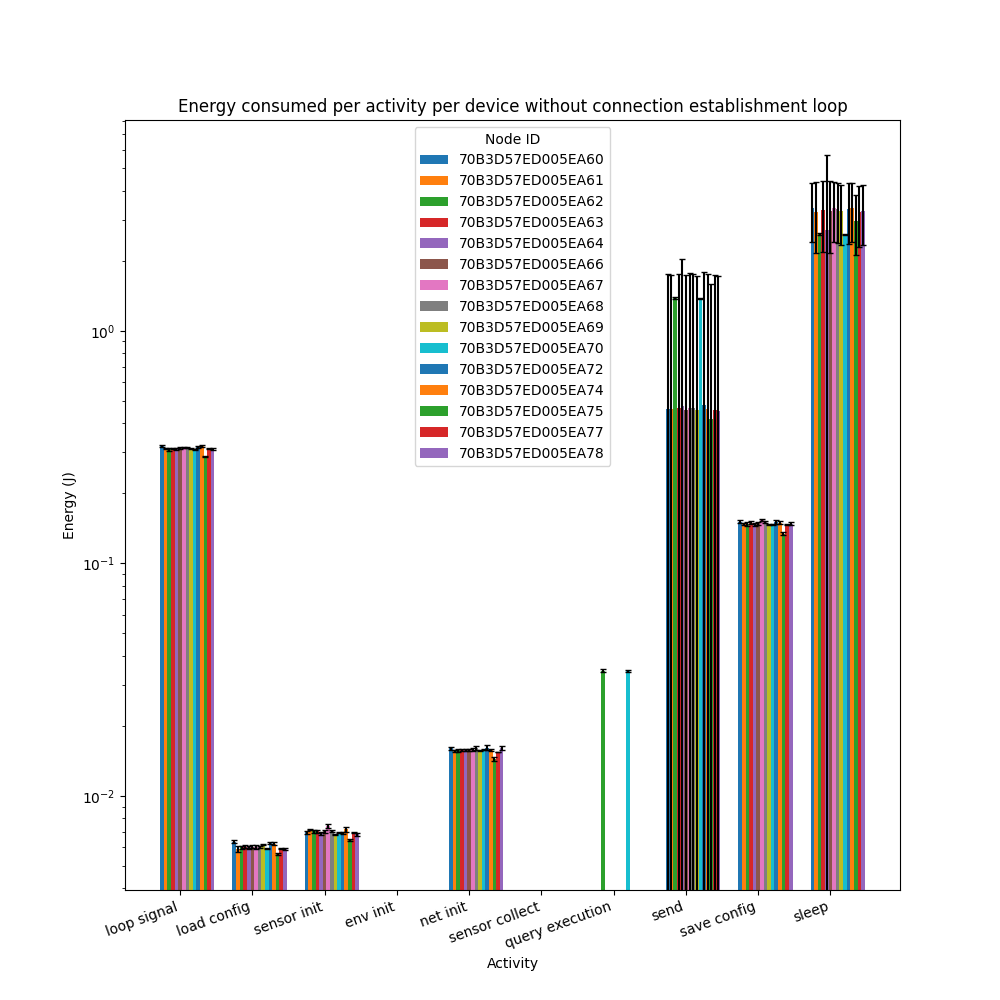

In [51]:
outer_columns = list(grouped_agg.columns.get_level_values(0).unique())
locations = np.arange(len(outer_columns))
width = 0.05
multiplier = 0
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for node_id, row in grouped_agg.groupby(level=0):
    values = row.loc[node_id,(slice(None),"mean")][["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]].values
    errors_low = values - ci.loc[node_id,(slice(None),"low")][["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
    errors_high = ci.loc[node_id,(slice(None),"high")][["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]] - values
    # for node_id, mean in row.loc[activity,"mean"].items():
    offset = width * multiplier

    rects = ax.bar(locations + offset, values, width, capsize=2, yerr=[errors_low, errors_high], label=node_id, log=True)
    #ax.bar_label(rects, padding=3)
    multiplier += 1
ax.legend(title="Node ID")
ax.set_title("Energy consumed per activity per device without connection establishment loop")
ax.set_ylabel("Energy (J)")
ax.set_xlabel("Activity")
ax.set_xticks(locations + 0.25, outer_columns, rotation=20, ha="right")
plt.show()

In [52]:
import gc
gc.collect()

1828

In [53]:

#TODO: vis distribution over query execution means
# IFT: 2 modaliteter: selectivity på filtre. lav exp med forskl. selectivity og regression til cost model
# størrelse af query: save cost afhænger af query størrelse

# TODO: from Viktor
# before doing the above try to from the data you have derive a power consumption per time period and estimate the powerconsumption linearly based on the time the activity takes
# regarding outliars in the total plot. Remove them. 
